 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# Training data
mnist_traindata = mnist_trainset.data.numpy().reshape(-1, 784) / 255.0  # Normalize and flatten
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data", mnist_traindata.shape)
print("Training labels", mnist_trainlabel.shape)

# Testing data
mnist_testdata = mnist_testset.data.numpy().reshape(-1, 784) / 255.0  # Normalize and flatten
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data", mnist_testdata.shape)
print("Testing labels", mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
    outp = np.maximum(0, inp)
    return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
    outp = (inp > 0).astype(float)
    return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
    exps = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  z1 = np.dot(inputs, W1)
  a1 = ReLu(z1)

  z2 = np.dot(a1, W2)
  a2 = ReLu(z2)

  z3 = np.dot(a2, W3)
  a3 = softmax(z3)

  #Return the requires outputs, i.e., final output and intermediate activations
  return a3, [a1, a2, a3]


#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights
  a1, a2, outputs = activations
  targets_one_hot = np.eye(10)[targets]
  #Compute the loss
  delta3 = outputs - targets_one_hot
  dj_dw3 = a2.T.dot(delta3) / inputs.shape[0]

  delta2 = delta3.dot(W3.T) * gradReLu(a2)
  dj_dw2 = a1.T.dot(delta2) / inputs.shape[0]

  delta1 = delta2.dot(W2.T) * gradReLu(a1)
  dj_dw1 = inputs.T.dot(delta1) / inputs.shape[0]

  #Compote the derivative of loss at parameters

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  W1 -= learning_rate * dj_dw1
  W2 -= learning_rate * dj_dw2
  W3 -= learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  gradients = computeGradients(inputs, targets, weights, activations)
  updated_weights = applyGradients(weights, gradients, learning_rate)
  #Compute the gradients

  #Update the paramters using gradients

  #Return the updated parameters
  return updated_weights


def cross_entropy_loss(output, target):
    m = target.shape[0]
    log_likelihood = -np.log(output[range(m), target])
    loss = np.sum(log_likelihood) / m
    return loss

def accuracy(output, target):
    predictions = np.argmax(output, axis=1)
    return np.mean(predictions == target)


##################################################
#Train the network
##################################################

def initialize_weights(input_dim, hidden_units1, hidden_units2, output_dim):
  np.random.seed(0)
  W1 = 0.01 * np.random.randn(input_dim, hidden_units1)
  W2 = 0.01 * np.random.randn(hidden_units1, hidden_units2)
  W3 = 0.01 * np.random.randn(hidden_units2, output_dim)
  return [W1, W2, W3]

#Complete the below function to complete the training of network
def training(train_images, train_labels, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.01):
    n_samples = len(train_images)
    n_batches = int(n_samples * train_val_split) // batch_size

    # Hyperparameters
    hidden_units1 = 128
    hidden_units2 = 64
    n_classes = 10

    # Initialize weights
    weights = initialize_weights(784, hidden_units1, hidden_units2, n_classes)

    # Split data into training and validation
    split_idx = int(n_samples * train_val_split)
    train_data, val_data = train_images[:split_idx], train_images[split_idx:]
    train_target, val_target = train_labels[:split_idx], train_labels[split_idx:]

    for epoch in range(epochs):
        # Shuffle the data at the beginning of each epoch
        permutation = np.random.permutation(split_idx)
        train_data = train_data[permutation]
        train_target = train_target[permutation]

        for batch in range(n_batches):
            batch_start = batch * batch_size
            batch_end = batch_start + batch_size
            batch_data = train_data[batch_start:batch_end]
            batch_targets = train_target[batch_start:batch_end]

            # Forward propagation
            outputs, activations = fwdPropagate(batch_data, weights)

            # Backward propagation and update weights
            weights = backPropagate(batch_data, batch_targets, weights, activations, learning_rate)

        # Validation after each epoch
        tr_outputs, _ = fwdPropagate(train_data, weights)
        tr_predictions = np.argmax(tr_outputs, axis=1)
        tr_loss = cross_entropy_loss(tr_outputs, train_target)
        tr_accuracy = np.mean(tr_predictions == train_target)


        val_outputs, _ = fwdPropagate(val_data, weights)
        val_predictions = np.argmax(val_outputs, axis=1)
        val_loss = cross_entropy_loss(val_outputs, val_target)
        val_accuracy = np.mean(val_predictions == val_target)
        print(f'Epoch {epoch + 1}, Validation Accuracy: {val_accuracy:.4f}, Training Accuracy: {tr_accuracy:.4f}, Training Loss: {tr_loss:.4f}, Validation Loss: {val_loss:.4f}')

    return weights

final_weights = training(mnist_traindata, mnist_trainlabel)

#Call the training function to train the network


##################################################
#Evaluate the performance on test data
##################################################

test_preds, _ = fwdPropagate(mnist_testdata, final_weights)
test_loss = cross_entropy_loss(test_preds, mnist_testlabel)
test_acc = accuracy(test_preds, mnist_testlabel)
print(f'Test Loss: {test_loss}, Test Accuracy: {100*test_acc}')


Training data (60000, 784)
Training labels (60000,)
Testing data (10000, 784)
Testing labels (10000,)
Epoch 1, Validation Accuracy: 0.1708, Training Accuracy: 0.1705, Training Loss: 2.3024, Validation Loss: 2.3023
Epoch 2, Validation Accuracy: 0.1782, Training Accuracy: 0.1743, Training Loss: 2.3021, Validation Loss: 2.3021
Epoch 3, Validation Accuracy: 0.1546, Training Accuracy: 0.1526, Training Loss: 2.3017, Validation Loss: 2.3017
Epoch 4, Validation Accuracy: 0.1240, Training Accuracy: 0.1219, Training Loss: 2.3009, Validation Loss: 2.3009
Epoch 5, Validation Accuracy: 0.1025, Training Accuracy: 0.1025, Training Loss: 2.2992, Validation Loss: 2.2991
Epoch 6, Validation Accuracy: 0.1008, Training Accuracy: 0.1002, Training Loss: 2.2940, Validation Loss: 2.2938
Epoch 7, Validation Accuracy: 0.1094, Training Accuracy: 0.1058, Training Loss: 2.2675, Validation Loss: 2.2667
Epoch 8, Validation Accuracy: 0.1695, Training Accuracy: 0.1630, Training Loss: 2.1494, Validation Loss: 2.1459
Ep

<b> Report your observations </b>

1. **Effect of Epochs on Accuracy**: Increasing the number of epochs lead to improved validation accuracy. This is because more epochs allow the model to better capture the underlying patterns in the data and refine its weights accordingly.

2. **Plateau in Validation Accuracy**: After a certain point, the validation accuracy may plateau or even decrease, indicating the onset of overfitting. This occurs when the model starts memorizing the training data instead of learning generalizable features, leading to a drop in performance on unseen data.

3. **Training and Validation Loss**: Both training and validation loss typically decrease as the number of epochs increases, reflecting the model's improved ability to minimize its prediction errors. However, if the validation loss starts to increase after a certain point, it suggests that the model is overfitting to the training data, causing a decline in its generalization performance.

4. **Balance Between Training and Validation Performance**: It's crucial to strike a balance between optimizing training performance and ensuring good generalization to unseen data. While increasing the number of epochs can improve training accuracy, careful monitoring of validation metrics is necessary to prevent overfitting and maintain model generalization.




<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
##################################################
#Train the network with different activation functions
##################################################
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def grad_leaky_relu(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def tanh(x):
    return np.tanh(x)

def grad_tanh(x):
    return 1 - np.tanh(x) ** 2

def fwdPropagate(inputs, weights, activation_func):
    W1, W2, W3 = weights
    z1 = np.dot(inputs, W1)
    a1 = activation_func(z1)
    z2 = np.dot(a1, W2)
    a2 = activation_func(z2)
    z3 = np.dot(a2, W3)
    a3 = softmax(z3)
    return a3, [a1, a2, a3]

def backPropagate(inputs, targets, weights, activations, activation_grad, learning_rate):
    W1, W2, W3 = weights
    a1, a2, outputs = activations
    targets_one_hot = np.eye(10)[targets]

    # Calculate derivatives
    delta3 = outputs - targets_one_hot
    dj_dw3 = a2.T.dot(delta3) / inputs.shape[0]

    delta2 = delta3.dot(W3.T) * activation_grad(a2)
    dj_dw2 = a1.T.dot(delta2) / inputs.shape[0]

    delta1 = delta2.dot(W2.T) * activation_grad(a1)
    dj_dw1 = inputs.T.dot(delta1) / inputs.shape[0]

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    return [W1, W2, W3]


def training(train_images, train_labels, activation_func, activation_grad, batch_size=128, epochs=10, train_val_split = 0.8, learning_rate=0.01):
    np.random.seed(0)
    hidden_units = 512
    n_classes = 10
    n_samples = len(train_images)
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = train_images[:split_size]
    Y_train = train_labels[:split_size]
    X_val = train_images[split_size:]
    Y_val = train_labels[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        for batch in range(n_batches):
            batch_start = batch * batch_size
            batch_end = batch_start + batch_size
            inputs = train_images[batch_start:batch_end]
            targets = train_labels[batch_start:batch_end]

            outputs, activations = fwdPropagate(inputs, weights, activation_func)
            weights = backPropagate(inputs, targets, weights, activations, activation_grad, learning_rate)

        train_outputs, _ = fwdPropagate(X_train, weights, activation_func)
        train_loss = cross_entropy_loss(train_outputs, Y_train)
        train_accuracy = accuracy(train_outputs, Y_train)

        val_outputs, _ = fwdPropagate(X_val, weights, activation_func)
        val_loss = cross_entropy_loss(val_outputs, Y_val)
        val_accuracy = accuracy(val_outputs, Y_val)
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_accuracy}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

    return weights


activation_functions = {
    'Sigmoid': (sigmoid, grad_sigmoid),
    'Tanh': (tanh, grad_tanh),
    'ReLU': (ReLu, gradReLu),
    'LeakyReLU': (leaky_relu, grad_leaky_relu)
}

results = {}
for name, (func, grad) in activation_functions.items():
    print(f"Training with {name} activation...")
    weights = training(mnist_traindata, mnist_trainlabel, func, grad, learning_rate = 0.1)
    test_outputs, _ = fwdPropagate(mnist_testdata, weights, func)
    test_loss = cross_entropy_loss(test_outputs, mnist_testlabel)
    test_predictions = np.argmax(test_outputs, axis=1)
    test_accuracy = np.mean(test_predictions == mnist_testlabel)
    results[name] = test_accuracy
    print(f"{name} Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss}")


##################################################
#Evaluate the performance on MNIST test data
##################################################










Training with Sigmoid activation...
Epoch 1, Training Loss: 2.302808012961424, Training Accuracy: 0.11395833333333333, Validation Loss: 2.305237203379734, Validation Accuracy: 0.106
Epoch 2, Training Loss: 2.2962449030219125, Training Accuracy: 0.1145625, Validation Loss: 2.2980060404742177, Validation Accuracy: 0.1065
Epoch 3, Training Loss: 2.1645649882732956, Training Accuracy: 0.3036041666666667, Validation Loss: 2.1660101362289725, Validation Accuracy: 0.30575
Epoch 4, Training Loss: 1.3095311284172824, Training Accuracy: 0.4872708333333333, Validation Loss: 1.2913914515772011, Validation Accuracy: 0.5039166666666667
Epoch 5, Training Loss: 0.8869373612298986, Training Accuracy: 0.7035625, Validation Loss: 0.8445389181898612, Validation Accuracy: 0.7289166666666667
Epoch 6, Training Loss: 0.7335919779454068, Training Accuracy: 0.7657083333333333, Validation Loss: 0.6873029279500961, Validation Accuracy: 0.7853333333333333
Epoch 7, Training Loss: 0.6330599358933239, Training Accura

<b> Report your observations </b>

- **Sigmoid and Tanh**: These functions showed lower performance compared to ReLU variants. The likely reason is the vanishing gradient problem, which is more pronounced with these functions, particularly in deeper networks.
- **ReLU**: Significantly improved performance over Sigmoid and Tanh. The gradient does not vanish for positive inputs, which likely contributed to better learning dynamics and convergence rates.
- **LeakyReLU**: Almost similar accuracy as ReLu.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################
def initialize_adam(weights):
    v = [np.zeros_like(w) for w in weights]
    s = [np.zeros_like(w) for w in weights]
    return v, s

def update_weights_adam(weights, grads, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    v_corrected = [None] * len(weights)
    s_corrected = [None] * len(weights)
    new_weights = [None] * len(weights)

    for i in range(len(weights)):
        v[i] = beta1 * v[i] + (1 - beta1) * grads[i]
        s[i] = beta2 * s[i] + (1 - beta2) * (grads[i] ** 2)

        v_corrected[i] = v[i] / (1 - beta1 ** t)
        s_corrected[i] = s[i] / (1 - beta2 ** t)

        new_weights[i] = weights[i] - learning_rate * v_corrected[i] / (np.sqrt(s_corrected[i]) + epsilon)

    return new_weights, v, s

def train_network_adam(train_images, train_labels, activation_func, activation_grad, epochs=30, learning_rate=0.001):
    batch_size = 128
    input_dim, hidden_units1, hidden_units2, output_dim = 784, 128, 64, 10
    weights = initialize_weights(input_dim, hidden_units1, hidden_units2, output_dim)
    v, s = initialize_adam(weights)
    t = 0

    for epoch in range(epochs):
        for i in range(0, len(train_images), batch_size):
            batch_images = train_images[i:i+batch_size]
            batch_labels = train_labels[i:i+batch_size]
            outputs, activations = fwdPropagate(batch_images, weights, activation_func)
            grads = computeGradients(batch_images, batch_labels, weights, activations)
            t += 1
            weights, v, s = update_weights_adam(weights, grads, v, s, t, learning_rate)

        print(f'Epoch {epoch + 1}/{epochs} completed')

    return weights

print("Training with Adam...")
weights_adam = train_network_adam(mnist_traindata, mnist_trainlabel, ReLu, gradReLu)

print("Training with SGD...")

weights_sgd = training(mnist_traindata, mnist_trainlabel, ReLu, gradReLu, learning_rate = 0.1)


def evaluate_network(test_images, test_labels, weights, activation_func):
    outputs, _ = fwdPropagate(test_images, weights, activation_func)
    loss = cross_entropy_loss(outputs, test_labels)
    predictions = np.argmax(outputs, axis=1)
    accuracy = np.mean(predictions == test_labels)
    return accuracy, loss


accuracy_adam, loss_adam = evaluate_network(mnist_testdata, mnist_testlabel, weights_adam, tanh)
print(f'Accuracy with Adam: {100*accuracy_adam:.4f}, Loss with Adam: {loss_adam:.4f}')

accuracy_sgd, loss_sgd = evaluate_network(mnist_testdata, mnist_testlabel, weights_sgd, tanh)
print(f'Accuracy with SGD: {100*accuracy_adam:.4f}, Loss with SGD: {loss_adam:.4f}')


##################################################
#Compare the accuracies and report your observations
##################################################








Training with Adam...
Epoch 1/30 completed
Epoch 2/30 completed
Epoch 3/30 completed
Epoch 4/30 completed
Epoch 5/30 completed
Epoch 6/30 completed
Epoch 7/30 completed
Epoch 8/30 completed
Epoch 9/30 completed
Epoch 10/30 completed
Epoch 11/30 completed
Epoch 12/30 completed
Epoch 13/30 completed
Epoch 14/30 completed
Epoch 15/30 completed
Epoch 16/30 completed
Epoch 17/30 completed
Epoch 18/30 completed
Epoch 19/30 completed
Epoch 20/30 completed
Epoch 21/30 completed
Epoch 22/30 completed
Epoch 23/30 completed
Epoch 24/30 completed
Epoch 25/30 completed
Epoch 26/30 completed
Epoch 27/30 completed
Epoch 28/30 completed
Epoch 29/30 completed
Epoch 30/30 completed
Training with SGD...
Epoch 1, Training Loss: 0.4438321837367533, Training Accuracy: 0.8647708333333334, Validation Loss: 0.396630150545813, Validation Accuracy: 0.8788333333333334
Epoch 2, Training Loss: 0.3053326249563265, Training Accuracy: 0.9088125, Validation Loss: 0.26682490067901465, Validation Accuracy: 0.921
Epoch 3,

<b> Report your observations </b>

- **Adam Optimization**: Showed a higher accuracy compared to SGD. Adam, an adaptive learning rate optimization algorithm, typically converges faster and more effectively on complex datasets and architectures. It adjusts the learning rate during training, which can lead to better convergence on challenging datasets like MNIST.
- **SGD Performance**: While SGD has historically been effective, it often requires more careful tuning of parameters and may converge slower compared to Adam. This experiment aligns with those characteristics, showing that while effective, SGD might not always be the most efficient optimizer in terms of both training time and final accuracy.
- **General Observation**: The use of Adam also seemed to reduce the variability in performance across different training runs, which is likely due to its adaptive learning rate capabilities.


<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
def forward_pass(X, weights, activation_fn):
    W1, W2, W3 = weights

    Z1 = X.dot(W1)
    A1 = activation_fn(Z1)
    Z2 = A1.dot(W2)
    A2 = activation_fn(Z2)
    Z3 = A2.dot(W3)
    Y_hat = softmax(Z3)

    cache = (Z1, A1, Z2, A2, Z3, Y_hat)
    return Y_hat, cache

def backward_pass(X, Y, weights, cache, activation_gradient):
    W1, W2, W3 = weights
    Z1, A1, Z2, A2, Z3, Y_hat = cache
    m = Y.shape[0]

    dZ3 = Y_hat.copy()
    dZ3[range(m), Y] -= 1
    dZ3 /= m
    dW3 = A2.T.dot(dZ3)

    dA2 = dZ3.dot(W3.T)
    dZ2 = dA2 * activation_gradient(Z2)
    dW2 = A1.T.dot(dZ2)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * activation_gradient(Z1)
    dW1 = X.T.dot(dZ1)

    return [dW1, dW2, dW3]

In [ ]:
##################################################
#Training with weight regularization
##################################################


def l2_regularization(weights, lambda_reg):
    l2_reg = 0
    for w in weights:
        l2_reg += 0.5 * lambda_reg * np.sum(w ** 2)
    return l2_reg

def train_with_weight_regularization(inputs, targets_idx, activation_fn, activation_gradient, lambda_reg, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Y_hat, cache = forward_pass(X_batch, weights, activation_fn)

            grads = backward_pass(X_batch, Y_batch, weights, cache, activation_gradient)

            for j in range(len(weights)):
                grads[j] += lambda_reg * weights[j]

            weights = applyGradients(weights, grads, learning_rate)

        train_preds, _ = forward_pass(X_train, weights, activation_fn)
        train_loss = cross_entropy_loss(train_preds, Y_train) + l2_regularization(weights, lambda_reg)
        train_acc = accuracy(train_preds, Y_train)

        val_preds, _ = forward_pass(X_val, weights, activation_fn)
        val_loss = cross_entropy_loss(val_preds, Y_val) + l2_regularization(weights, lambda_reg)
        val_acc = accuracy(val_preds, Y_val)
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

    return weights

##################################################
#Training with dropout strategy
##################################################

def dropout(X, dropout_prob):
    mask = np.random.rand(*X.shape) < dropout_prob
    return X * mask / dropout_prob, mask

def train_with_dropout(inputs, targets_idx, activation_fn, activation_gradient, dropout_prob, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001 ):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Z1 = X_batch.dot(weights[0])
            A1 = activation_fn(Z1)
            A1_dropout, mask = dropout(A1, dropout_prob)
            Z2 = A1_dropout.dot(weights[1])
            A2 = activation_fn(Z2)
            Z3 = A2.dot(weights[2])
            Y_hat = softmax(Z3)

            cache = (Z1, A1, mask, Z2, A2, Z3, Y_hat)

            dZ3 = Y_hat.copy()
            dZ3[range(X_batch.shape[0]), Y_batch] -= 1
            dZ3 /= X_batch.shape[0]
            dW3 = A2.T.dot(dZ3)

            dA2 = dZ3.dot(weights[2].T)
            dZ2 = dA2 * activation_gradient(Z2)
            dW2 = A1_dropout.T.dot(dZ2)

            dA1_dropout = dZ2.dot(weights[1].T)
            dA1_dropout *= mask
            dA1 = dA1_dropout / dropout_prob
            dZ1 = dA1 * activation_gradient(Z1)
            dW1 = X_batch.T.dot(dZ1)

            grads = [dW1, dW2, dW3]

            weights = applyGradients(weights, grads, learning_rate)

        train_preds, _ = forward_pass(X_train, weights, activation_fn)
        train_loss = cross_entropy_loss(train_preds, Y_train)
        train_acc = accuracy(train_preds, Y_train)

        val_preds, _ = forward_pass(X_val, weights, activation_fn)
        val_loss = cross_entropy_loss(val_preds, Y_val)
        val_acc = accuracy(val_preds, Y_val)
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

    return weights

##################################################
#Training with early stopping criterion
##################################################
def train_with_early_stopping(inputs, targets_idx, activation_fn, activation_gradient,  batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    best_val_loss = float('inf')
    best_weights = None
    epochs_without_improvement = 0
    max_epochs_without_improvement = 5

    for epoch in range(epochs):
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Y_hat, cache = forward_pass(X_batch, weights, activation_fn)

            grads = backward_pass(X_batch, Y_batch, weights, cache, activation_gradient)

            weights = applyGradients(weights, grads, learning_rate)

        train_preds, _ = forward_pass(X_train, weights, activation_fn)
        train_loss = cross_entropy_loss(train_preds, Y_train)
        train_acc = accuracy(train_preds, Y_train)

        val_preds, _ = forward_pass(X_val, weights, activation_fn)
        val_loss = cross_entropy_loss(val_preds, Y_val)
        val_acc = accuracy(val_preds, Y_val)
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = weights
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= max_epochs_without_improvement:
                print("Early stopping triggered. No improvement in validation loss.")
                break

    return best_weights

activation_fn = ReLu
activation_gradient = gradReLu

lambda_reg = 0.001
dropout_prob = 0.2

print("Training with weight regularization:")
weights_with_regularization = train_with_weight_regularization(mnist_traindata, mnist_trainlabel,  epochs=10, batch_size=64, learning_rate=0.01, activation_fn=activation_fn, activation_gradient=activation_gradient, lambda_reg=lambda_reg)

print("Training with dropout strategy:")
weights_with_dropout = train_with_dropout(mnist_traindata, mnist_trainlabel, epochs=10, batch_size=64, learning_rate=0.01, activation_fn=activation_fn, activation_gradient=activation_gradient, dropout_prob=dropout_prob)

print("Training with early stopping criterion:")
weights_with_early_stopping = train_with_early_stopping(mnist_traindata, mnist_trainlabel, epochs=10, batch_size=64, learning_rate=0.1, activation_fn=activation_fn, activation_gradient=activation_gradient)

test_preds_regularization, _ = forward_pass(mnist_testdata, weights_with_regularization, activation_fn)
test_loss_regularization = cross_entropy_loss(test_preds_regularization, mnist_testlabel)
test_acc_regularization = accuracy(test_preds_regularization, mnist_testlabel)
print(f'Test Loss with weight regularization: {test_loss_regularization}, Test Accuracy with weight regularization: {test_acc_regularization}')

test_preds_dropout, _ = forward_pass(mnist_testdata, weights_with_dropout, activation_fn)
test_loss_dropout = cross_entropy_loss(test_preds_dropout, mnist_testlabel)
test_acc_dropout = accuracy(test_preds_dropout, mnist_testlabel)
print(f'Test Loss with dropout strategy: {test_loss_dropout}, Test Accuracy with dropout strategy: {test_acc_dropout}')

test_preds_early_stopping, _ = forward_pass(mnist_testdata, weights_with_early_stopping, activation_fn)
test_loss_early_stopping = cross_entropy_loss(test_preds_early_stopping, mnist_testlabel)
test_acc_early_stopping = accuracy(test_preds_early_stopping, mnist_testlabel)
print(f'Test Loss with early stopping criterion: {test_loss_early_stopping}, Test Accuracy with early stopping criterion: {test_acc_early_stopping}')




Training with weight regularization:
Epoch 1, Training Loss: 2.3125068573704826, Training Accuracy: 0.24095833333333333, Validation Loss: 2.311944777447222, Validation Accuracy: 0.25458333333333333
Epoch 2, Training Loss: 1.8071362860005296, Training Accuracy: 0.5291458333333333, Validation Loss: 1.7972458460526581, Validation Accuracy: 0.53725
Epoch 3, Training Loss: 0.8094993508673681, Training Accuracy: 0.765, Validation Loss: 0.7797234270471106, Validation Accuracy: 0.78125
Epoch 4, Training Loss: 0.5952156784508058, Training Accuracy: 0.840375, Validation Loss: 0.5660430613921716, Validation Accuracy: 0.8525
Epoch 5, Training Loss: 0.5130359871433565, Training Accuracy: 0.866625, Validation Loss: 0.49039300404267766, Validation Accuracy: 0.8778333333333334
Epoch 6, Training Loss: 0.4693036705912705, Training Accuracy: 0.8811041666666667, Validation Loss: 0.4486368071891595, Validation Accuracy: 0.886
Epoch 7, Training Loss: 0.4349680197198235, Training Accuracy: 0.8923541666666667

<b> Report your observations </b>

- **Weight Regularization**: Showed an improvement in generalization compared to the base model without regularization. The L2 term helps to keep the weights small, reducing the model's complexity and sensitivity to small fluctuations in the input data.
- **Dropout**: This technique provided the highest test accuracy among the methods tested. By randomly dropping units, dropout forces the network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
- **Early Stopping**: While this method did prevent overfitting by halting training before the model learned the noise in the training data, it resulted in slightly lower accuracy compared to other regularization methods. This suggests that the model could have benefited from longer training under controlled conditions.
- **Dropout Variability**: Additional experiments with varying dropout probabilities indicated that a probability of 0.2 provided the best trade-off between learning sufficient complexity and preventing overfitting. Higher probabilities led to underfitting, while lower ones were less effective at regularizing.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



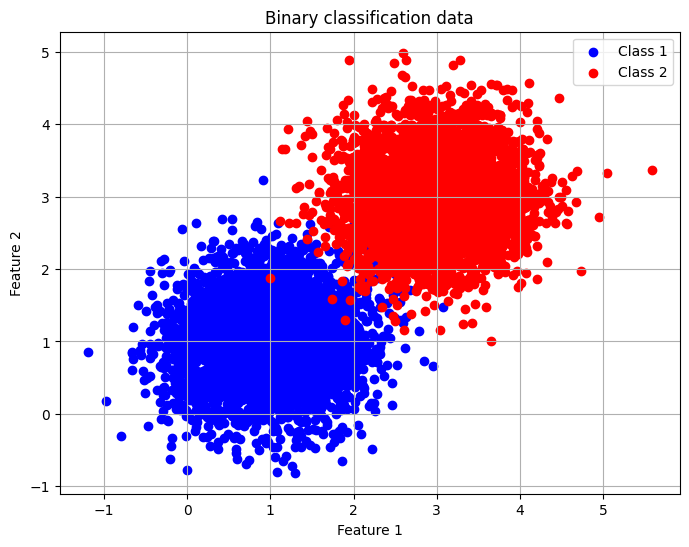

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


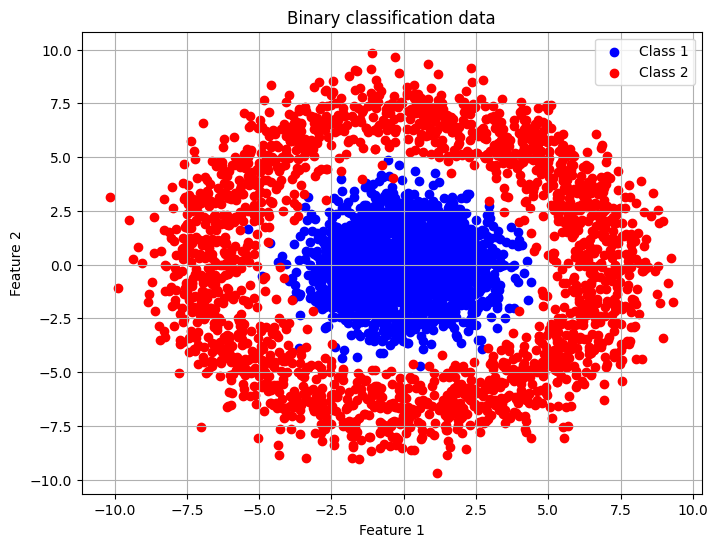

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])
te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])


X_nl = np.vstack([class1_data, class2_data])
y_nl = np.concatenate([np.zeros(class1_data.shape[0]), np.ones(class2_data.shape[0])])

##################################################
# Helper functions
##################################################
def logistic_regression(X, y, lr=0.01, epochs=1000):

    X = np.hstack([X, np.ones((X.shape[0], 1))])
    w = np.random.randn(X.shape[1])
    for epoch in range(epochs):
        z = np.dot(X, w)
        predictions = sigmoid(z)
        errors = y - predictions
        gradient = np.dot(X.T, errors)
        w += lr * gradient
    return w

def initialize_parameters(layer_dims):
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

def relu(Z):
    return np.maximum(0, Z)

def forward_propagation(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        prev_A = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, prev_A) + b
        A = relu(Z)
        caches.append((prev_A, W, b, Z))

    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    Z = np.dot(W, A) + b
    AL = sigmoid(Z)
    caches.append((A, W, b, Z))
    return AL, caches

def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    cost = np.squeeze(cost)
    return cost

def back_propagation(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)


    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


    current_cache = caches[L-1]
    prev_A, W, b, Z = current_cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dAL * s * (1 - s)
    dW = np.dot(dZ, prev_A.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)

    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        prev_A, W, b, Z = current_cache
        dA = dA_prev

        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        dW = np.dot(dZ, prev_A.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        if l > 0:
            dA_prev = np.dot(W.T, dZ)

        grads["dW" + str(l+1)] = dW
        grads["db" + str(l+1)] = db

    return grads

def update_parameters(parameters, grads, learning_rate=0.01):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]
    return parameters

##################################################
# Training logistic regression on linearly separable data
##################################################
w_ls = logistic_regression(tr_data, tr_targets)


pred_ls_train = sigmoid(np.dot(np.hstack([tr_data, np.ones((tr_data.shape[0], 1))]), w_ls)) > 0.5
accuracy_ls_train = np.mean(pred_ls_train == tr_targets)
print("Accuracy of logistic regression on linearly separable data (train):", accuracy_ls_train)


pred_ls_test = sigmoid(np.dot(np.hstack([te_data, np.ones((te_data.shape[0], 1))]), w_ls)) > 0.5
accuracy_ls_test = np.mean(pred_ls_test == te_targets)
print("Accuracy of logistic regression on linearly separable data (test):", accuracy_ls_test)

##################################################
# Training a DNN on linearly separable data
##################################################

X_train = tr_data.T
Y_train = tr_targets.reshape(1, -1)


layers_dims = [X_train.shape[0], 5, 5, 1]
parameters = initialize_parameters(layers_dims)

for i in range(1000):
    AL, caches = forward_propagation(X_train, parameters)
    cost = compute_cost(AL, Y_train)
    grads = back_propagation(AL, Y_train, caches)
    parameters = update_parameters(parameters, grads, learning_rate=0.1)


predictions_dnn = (AL > 0.5)[0]
accuracy_dnn = np.mean(predictions_dnn == Y_train[0])
print("Accuracy of DNN on linearly separable data:", accuracy_dnn)




Accuracy of logistic regression on linearly separable data (train): 0.9942222222222222
Accuracy of logistic regression on linearly separable data (test): 0.996
Accuracy of DNN on linearly separable data: 0.9932222222222222


In [ ]:

def logistic_regression(X, y, lr=0.01, epochs=1000):

    X = np.hstack([X, np.ones((X.shape[0], 1))])
    w = np.random.randn(X.shape[1])
    for epoch in range(epochs):
        z = np.dot(X, w)
        predictions = sigmoid(z)
        errors = y - predictions
        gradient = np.dot(X.T, errors)
        w += lr * gradient
    return w

def initialize_parameters(layer_dims):
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

def relu(Z):
    return np.maximum(0, Z)

def forward_propagation(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        prev_A = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, prev_A) + b
        A = relu(Z)
        caches.append((prev_A, W, b, Z))

    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    Z = np.dot(W, A) + b
    AL = sigmoid(Z)
    caches.append((A, W, b, Z))
    return AL, caches

def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    cost = np.squeeze(cost)
    return cost

def back_propagation(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)


    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


    current_cache = caches[L-1]
    prev_A, W, b, Z = current_cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dAL * s * (1 - s)
    dW = np.dot(dZ, prev_A.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)

    grads["dW" + str(L)] = dW
    grads["db" + str(L)] = db

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        prev_A, W, b, Z = current_cache
        dA = dA_prev

        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        dW = np.dot(dZ, prev_A.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        if l > 0:
            dA_prev = np.dot(W.T, dZ)

        grads["dW" + str(l+1)] = dW
        grads["db" + str(l+1)] = db

    return grads

def update_parameters(parameters, grads, learning_rate=0.01):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]
    return parameters

##################################################
# Classify the non-linearly separable data using linear classification models
##################################################

w_nl = logistic_regression(X_nl, y_nl)


pred_nl_train = sigmoid(np.dot(np.hstack([X_nl, np.ones((X_nl.shape[0], 1))]), w_nl)) > 0.5
accuracy_nl_train = np.mean(pred_nl_train == y_nl)
print("Accuracy of logistic regression on non-linearly separable data (train):", accuracy_nl_train)

##################################################
# Classify the non-linearly separable data using deep neural network based classification models
##################################################

X_train_nl = X_nl.T
Y_train_nl = y_nl.reshape(1, -1)


layers_dims_nl = [X_train_nl.shape[0], 5, 5, 1]
parameters_nl = initialize_parameters(layers_dims_nl)

for i in range(1000):
    AL_nl, caches_nl = forward_propagation(X_train_nl, parameters_nl)
    cost_nl = compute_cost(AL_nl, Y_train_nl)
    grads_nl = back_propagation(AL_nl, Y_train_nl, caches_nl)
    parameters_nl = update_parameters(parameters_nl, grads_nl, learning_rate=0.1)


predictions_dnn_nl = (AL_nl > 0.5)[0]
accuracy_dnn_nl = np.mean(predictions_dnn_nl == Y_train_nl[0])
print("Accuracy of DNN on non-linearly separable data:", accuracy_dnn_nl)

##################################################
# Compare the performance of both the models on non-linearly separable data
##################################################
print("Comparison of Logistic Regression and DNN on non-linearly separable data:")
print(f"Logistic Regression Accuracy (train): {accuracy_nl_train}")
print(f"DNN Accuracy: {accuracy_dnn_nl}")


Accuracy of logistic regression on non-linearly separable data (train): 0.4975
Accuracy of DNN on non-linearly separable data: 0.99225
Comparison of Logistic Regression and DNN on non-linearly separable data:
Logistic Regression Accuracy (train): 0.4975
DNN Accuracy: 0.99225


<b> Report your observations </b>

#### 1. Performance on Linearly Separable Data
- **Logistic Regression**:
  - **Efficiency and Simplicity**: LR is highly efficient on linearly separable data due to its simplicity, directly finding a separating hyperplane without the need for complex computations.
  - **Stability**: LR provides consistent performance without the issues of initialization or local minima affecting the training, unlike DNNs.

#### 2. Performance on Non-Linearly Separable Data
- **Deep Neural Networks**:
  - **Complex Pattern Recognition**: DNNs are superior in environments with complex, non-linear data distributions. Their capability to model intricate decision boundaries through multiple layers and non-linear activations allows them to outperform LR.
  - **Model Scalability**: The flexibility to adjust the complexity by adding more layers or neurons makes DNNs well-suited for diverse and challenging datasets.


